In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

from helpers.pandas import standardize

In [2]:
%config Inline.figure_format = 'retina'
az.style.use("arviz-darkgrid")
np.random.seed(0)

In [3]:
data = pd.read_csv("./data/WaffleDivorce.csv", delimiter=";")
data.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


### Figure 5.1


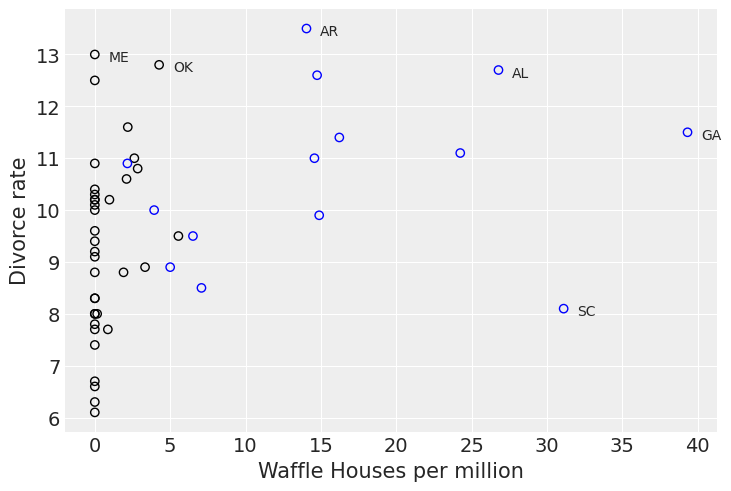

In [4]:
fig, ax = plt.subplots()

# assign colours to confederate states
colors = {"1": "blue", "0": "black"}

ax.scatter(
    data["WaffleHouses"] / data["Population"],
    data["Divorce"],
    lw=1,
    color=(0, 0, 0, 0),
    edgecolor=data["South"].apply(lambda x: colors[str(x)]),
)

ax.set_xlabel("Waffle Houses per million")
ax.set_ylabel("Divorce rate")

# take only the states with Divorce rate over 12.6 or number of Waffle houses per million inhabitants over 30
selection = data[
    (data["Divorce"] > 12.6) | (data["WaffleHouses"] / data["Population"] > 30)
]

# label those points
for state, div, ratio in zip(
    selection["Loc"],
    selection["WaffleHouses"] / selection["Population"],
    selection["Divorce"],
):
    ax.annotate(
        f"{state}", xy=(div, ratio), textcoords="offset points", xytext=(10, -5)
    )

### Code 5.1


In [5]:
# Standardize regressors and target
data["Divorce_std"] = standardize(data["Divorce"])
data["Marriage_std"] = standardize(data["Marriage"])
data["MedianAgeMarriage_std"] = standardize(data["MedianAgeMarriage"])

In [6]:
with pm.Model() as m5_3:
    A = data["MedianAgeMarriage"]
    M = data["Marriage"]
    alpha = pm.Normal("alpha", mu=0, sigma=0.2)
    bA = pm.Normal("bA", mu=0, sigma=0.5)
    bM = pm.Normal("bM", mu=0, sigma=0.5)
    mu = alpha + bM * M + bA * A
    sigma = pm.Exponential("sigma", 1)
    pm.Normal("M", mu=mu, sigma=sigma)

    map_estimate = pm.find_MAP()
    trace = pm.sample(draws=2000, tune=1000)

Output()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, bA, bM, sigma, M]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.
There were 3359 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [7]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.022,0.180,-0.321,0.340,0.036,0.026,25.0,315.0,1.11
bA,-0.266,0.507,-0.947,1.050,0.160,0.117,10.0,19.0,1.43
bM,0.047,0.617,-0.839,1.300,0.236,0.194,8.0,13.0,1.58
M[0],-5.797,18.930,-39.534,29.118,6.756,4.967,9.0,12.0,1.38
M[1],-5.486,21.546,-42.379,34.209,7.810,5.749,9.0,12.0,1.40
M[2],-5.819,19.000,-38.357,30.966,6.760,4.968,9.0,12.0,1.38
M[3],-5.234,21.392,-41.186,35.190,7.755,5.709,9.0,12.0,1.40
M[4],-6.291,18.860,-37.843,31.487,6.633,4.871,9.0,12.0,1.37
M[5],-5.620,20.524,-39.389,34.040,7.356,5.410,9.0,12.0,1.39
M[6],-6.654,18.404,-38.040,30.812,6.392,4.689,9.0,13.0,1.35


## 5.1.5.1 Predictor Residual Plot

"The benefit of computing these things is that, once plotted against the outcome, we have a bivariate regression that has already conditioned on all of the other predictor variables. It leaves the variation that is not expected by the model of the mean, µ, as a function of the other predictors."


### Code 5.13


In [10]:
data.columns

Index(['Location', 'Loc', 'Population', 'MedianAgeMarriage', 'Marriage',
       'Marriage SE', 'Divorce', 'Divorce SE', 'WaffleHouses', 'South',
       'Slaves1860', 'Population1860', 'PropSlaves1860', 'Divorce_std',
       'Marriage_std', 'MedianAgeMarriage_std'],
      dtype='object')

In [13]:
with pm.Model() as m5_4:
    a = pm.Normal("a", mu=0, sigma=0.2)
    bAM = pm.Normal("bAM", mu=0, sigma=0.5)

    mu = pm.Deterministic("mu", a + bAM * data["MedianAgeMarriage_std"].values)
    sigma = pm.Exponential("sigma", 1)

    marriage_std = pm.Normal(
        "Marriage_std", mu=mu, sigma=sigma, observed=data["Marriage_std"].values
    )
    priors = pm.sample_prior_predictive()
    m5_4_trace = pm.sample()

Sampling: [Marriage_std, a, bAM, sigma]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bAM, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


### Code 5.14


In [ ]:
mu_m5_4_mean = m5_4_trace.posterior["mu"].mean(dim=["chain", "draw"])
residuals = data["Marriage_std"] - mu_m5_4_mean

print(
    "When a residual is positive, that means that the observed rate was in excess of what the model expects, given the median age at marriage in that State. When a residual is negative, that means the observed rate was below what the model expects."
)
residuals

When a residual is positive, that means that the observed rate was in excess of what the model expects, given the median age at marriage in that State. When a residual is negative, that means the observed rate was below what the model expects.


0    -0.397009
1     1.074280
2    -0.091338
3     0.676789
4     0.151379
5     0.695363
6     0.071718
7     1.092855
8     1.402930
9    -0.625030
10    0.438475
11    1.734405
12   -0.095742
13   -0.052848
14   -0.278858
15    0.001153
16   -0.064338
17   -0.149744
18    0.043521
19   -1.546590
20    0.220077
21    0.232237
22   -0.756681
23   -1.128513
24   -0.354641
25   -0.650690
26   -0.621152
27   -0.499123
28   -0.480548
29   -0.478011
30   -0.065008
31    0.439672
32   -0.120876
33    1.314461
34   -0.707228
35    0.048069
36   -0.348226
37   -0.628907
38   -0.146010
39   -0.335396
40   -0.255735
41   -0.663520
42   -0.110583
43    0.960677
44   -0.503671
45    0.296531
46    0.254163
47   -0.038007
48   -0.628237
49    1.753123
Name: Marriage_std, dtype: float64